In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading the data
train=pd.read_csv('linear_regression_dataset.csv')
test=pd.read_csv('linear_regression_dataset.csv')


In [12]:
train=(train-train.mean())/train.std() #normalising the data


In [13]:
train_data = train.values
Y = train_data[:400, 4].reshape(400, 1)
X = train_data[:400,[0,1,2,3,5]]


In [14]:
test_data = test.values
Y_test = test_data[-20:, 4].reshape(20, 1)
X_test = test_data[-20:,[0,1,2,3,5]]

In [15]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0],)),X_test.T)).T


In [16]:
def model(X, Y, learning_rate, iteration):
    m = Y.size
    theta = np.zeros((X.shape[1], 1))
    cost_list = []
    for i in range(iteration):
        y_pred = np.dot(X, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        d_theta = (1/m)*np.dot(X.T, y_pred - Y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)
                                        # to print the cost for 10 times
        if(i%(iteration/10) == 0):
            print("Cost is :", cost)
    return theta, cost_list
    

In [17]:
iteration = 10000
learning_rate = 0.00000000005
theta, cost_list = model(X, Y, learning_rate, iteration)

Cost is : 0.58651455431196
Cost is : 0.5865145204720783
Cost is : 0.5865144866322005
Cost is : 0.5865144527923264
Cost is : 0.586514418952456
Cost is : 0.5865143851125895
Cost is : 0.5865143512727266
Cost is : 0.5865143174328675
Cost is : 0.586514283593012
Cost is : 0.5865142497531606


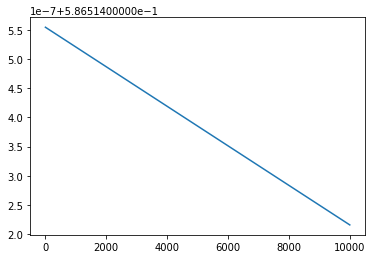

In [18]:
rng = np.arange(0, iteration)
plt.plot(rng, cost_list)
plt.show()

In [19]:
y_pred = np.dot(X_test, theta)
error = (1/X_test.shape[0])*np.sum(np.abs(y_pred - Y_test))

In [20]:
print("Test error is :", error*100, "%")
print("Test Accuracy is :", (1- error)*100, "%")

Test error is : 173855.01234555605 %
Test Accuracy is : -173755.01234555605 %
